In [69]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy

%load_ext autoreload
%autoreload 2   

sys.path.insert(0,os.pardir)
import rt1kernel
import rt1raytrace
from debug_init import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
RT1_kernel = rt1kernel.Kernel2D_scatter(dxf_file='../dxf_files/simplest0.dxf',show_print=False)
RT1_kernel.set_induced_point(**np.load('inducing-point_20220610.npz'),length_sq_fuction=Length_scale_sq)
RT1_kernel.set_bound_space(delta_l=5e-3)

you have to "create_induced_point()" or "set_induced_point()" next.
num of bound point is  932


In [61]:
r_medium = np.linspace(0.05,1.05,150)
z_medium = np.linspace(-0.7,0.7,150)
r_plot   =np.linspace(0.05,1.05,500)
z_plot   =np.linspace(-0.7,0.7,500)

RT1_kernel.set_grid_interface( z_medium=z_medium,
                               r_medium=r_medium,
                               z_plot  =z_plot  ,
                               r_plot  =r_plot  ) 

Arcs  detection: 100%|██████████| 9/9 [00:00<00:00, 164.38it/s]


Arcs  detection: 100%|██████████| 9/9 [00:00<00:00, 11.50it/s]

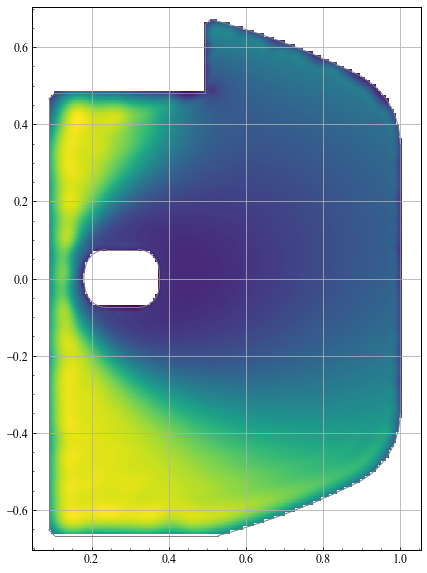

In [68]:
f = Length_scale(RT1_kernel.rI,RT1_kernel.zI)

F,mask,im_kwargs =  RT1_kernel.convert_grid_media(f)

fig,ax = plt.subplots(figsize=(10,10))
RT1_kernel.append_frame(ax)
ax.imshow(F*mask,**im_kwargs)